In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define Project Folder
FOLDERNAME = 'Colab\ Notebooks/practice_20230411'

%cd drive/MyDrive/$FOLDERNAME

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/practice_20230411


In [ ]:
# Define device
import torch
torch.manual_seed(2)
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print('Device:', device)

Device: cuda


In [ ]:
# Load Existing Dataset
import torchvision.datasets as dset
import torchvision.transforms as T

transform_train = T.Compose([T.Resize((224,224)), T.RandomVerticalFlip(p=0.5), 
                             T.ToTensor(),T.RandomHorizontalFlip(p=0.5),T.RandomRotation(45), 
                             T.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1)])
transform_test = T.Compose([T.Resize((224,224)), T.ToTensor()])
train_data = dset.Flowers102('./train', download=True, transform=transform_train)
val_data = dset.Flowers102('./val', 'val', download=True, transform=transform_train)
test_data = dset.Flowers102('./test', 'test', download=True, transform=transform_test)

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os
class TestFlowers(Dataset):
  def __init__(self, filenames, transform):
    self.filenames = filenames
    self.transform = transform
  def __len__(self):
    return len(self.filenames)
  def __getitem__(self, index):
    file_name = self.filenames[index]
    img_path = os.path.join('test/flowers-102/jpg/', file_name)
    img = Image.open(img_path)
    tensor_x = self.transform(img)
    return tensor_x, file_name

In [ ]:
test_file_path = []
for filename in os.listdir('test/flowers-102/jpg/'):
  if len(filename) >= 12:
    test_file_path.append(filename)

In [ ]:
test_data_name = TestFlowers(test_file_path, transform_test)
print(test_data_name[0])
print(test_data[0])

(tensor([[[0.1451, 0.1725, 0.1961,  ..., 0.5686, 0.6941, 0.4863],
         [0.1216, 0.1725, 0.1922,  ..., 0.7294, 0.8235, 0.7333],
         [0.1333, 0.1804, 0.1843,  ..., 0.8471, 0.8784, 0.9098],
         ...,
         [0.1373, 0.1451, 0.1333,  ..., 0.1451, 0.1451, 0.1529],
         [0.1529, 0.1490, 0.1373,  ..., 0.1608, 0.1647, 0.1725],
         [0.1608, 0.1412, 0.1294,  ..., 0.1529, 0.1804, 0.1843]],

        [[0.2000, 0.2196, 0.2392,  ..., 0.5961, 0.7137, 0.4941],
         [0.1725, 0.2196, 0.2353,  ..., 0.7412, 0.8314, 0.7373],
         [0.1843, 0.2275, 0.2275,  ..., 0.8353, 0.8706, 0.9098],
         ...,
         [0.2353, 0.2431, 0.2314,  ..., 0.2588, 0.2627, 0.2706],
         [0.2510, 0.2471, 0.2353,  ..., 0.2667, 0.2706, 0.2784],
         [0.2588, 0.2392, 0.2275,  ..., 0.2588, 0.2824, 0.2863]],

        [[0.0627, 0.0667, 0.0706,  ..., 0.3922, 0.5059, 0.2784],
         [0.0431, 0.0667, 0.0667,  ..., 0.5451, 0.6353, 0.5451],
         [0.0588, 0.0745, 0.0627,  ..., 0.6471, 0.6902, 0

In [ ]:
# Check Data Dimension
print(train_data)
print(val_data)
print(test_data)

Dataset Flowers102
    Number of datapoints: 1020
    Root location: ./train
    split=train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
           )
Dataset Flowers102
    Number of datapoints: 1020
    Root location: ./val
    split=val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
      

In [ ]:
num_train = len(train_data)
num_val = len(val_data)
print('Number of training:', num_train)
print('Number of validation:', num_val)

Number of training: 1020
Number of validation: 1020


In [ ]:
from torch.utils.data import DataLoader
mini_trains = DataLoader(train_data, batch_size=16, shuffle=True)
mini_vals = DataLoader(val_data, batch_size=16, shuffle=True)
mini_tests = DataLoader(test_data, batch_size=1, shuffle=False)

In [ ]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

resnet = models.resnet18(pretrained=True).cuda()
num_flatten = resnet.fc.in_features
resnet.fc = nn.Linear(num_flatten, 102)
model = resnet.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 174MB/s]


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-5)

In [ ]:
# Validating Procedure
def evaluate(model, epoch, mini_vals, device, val_acc_history):
  model.eval()
  with torch.no_grad():
    total = 0
    for x, y in mini_vals:
      x = x.to(device)
      y = y.to(device)
      scores = model(x)
      predictions = scores.max(1)[1]
      acc = predictions.eq(y).sum().item()
      total += acc
    val_acc_history.append(total/num_val)
    print(f'Epoch[{epoch+1}] Acc: {total/num_val}')

In [ ]:
cost_history = []
val_acc_history = []
train_acc_history = []

In [ ]:
# Training Procedure
def train(num_epoch, model, mini_trains, mini_vals, device, optimizer, cost_history, train_acc_history):
  for epoch in range(num_epoch):
    running_loss = 0
    training_acc = 0
    for count, (x, y) in enumerate(mini_trains):
      model.train()
      x = x.to(device)
      y = y.to(device)
      score = model(x)
      loss_function = nn.CrossEntropyLoss()
      loss = loss_function(score, y)
      running_loss =+ loss.item()
      predictions = score.max(1)[1]
      acc = predictions.eq(y).sum().item()
      training_acc += acc
      if count % 20 == 0:
        print(f'Epoch[{epoch + 1}]: {loss.item()}', end='/')
        batches = count + 1
        train_acc_history.append(training_acc/(batches*16))
        evaluate(model, epoch, mini_vals, device, val_acc_history)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    cost_history.append(running_loss/len(train_data))
    print('Cost:', running_loss/len(train_data))

In [ ]:
# Start training 
train(13, model, mini_trains, mini_vals, device, optimizer, cost_history, train_acc_history)

Epoch[1]: 4.739687442779541/Epoch[1] Acc: 0.011764705882352941
Epoch[1]: 4.869004249572754/Epoch[1] Acc: 0.027450980392156862
Epoch[1]: 4.6252546310424805/Epoch[1] Acc: 0.07450980392156863
Epoch[1]: 4.128371238708496/Epoch[1] Acc: 0.1480392156862745
Cost: 0.003945536239474428
Epoch[2]: 4.385562896728516/Epoch[2] Acc: 0.15980392156862744
Epoch[2]: 3.688256025314331/Epoch[2] Acc: 0.25098039215686274
Epoch[2]: 3.644289970397949/Epoch[2] Acc: 0.3284313725490196
Epoch[2]: 3.5654351711273193/Epoch[2] Acc: 0.41568627450980394
Cost: 0.0032977983063342525
Epoch[3]: 3.0134637355804443/Epoch[3] Acc: 0.4088235294117647
Epoch[3]: 3.1331002712249756/Epoch[3] Acc: 0.4549019607843137
Epoch[3]: 3.139287233352661/Epoch[3] Acc: 0.5088235294117647
Epoch[3]: 3.3592660427093506/Epoch[3] Acc: 0.5735294117647058
Cost: 0.002714431753345564
Epoch[4]: 2.7320716381073/Epoch[4] Acc: 0.5745098039215686
Epoch[4]: 2.1449389457702637/Epoch[4] Acc: 0.592156862745098
Epoch[4]: 2.376746654510498/Epoch[4] Acc: 0.623529411

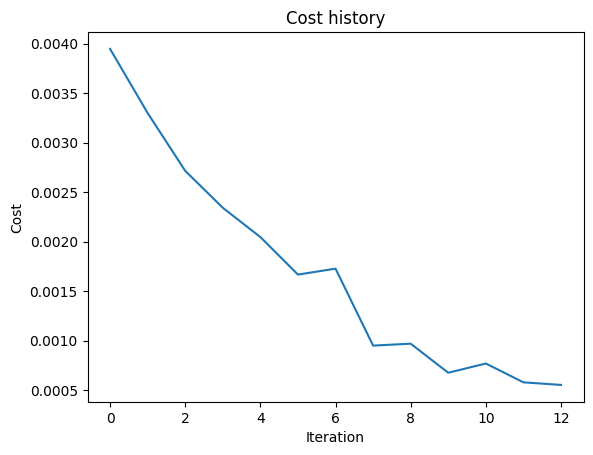

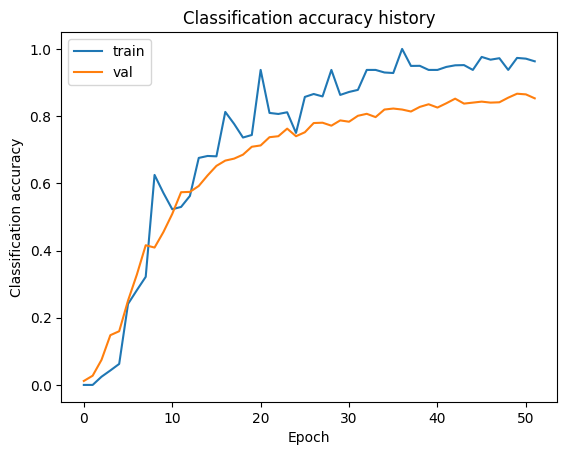

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.title('Cost history')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

plt.plot(train_acc_history, label='train')
plt.plot(val_acc_history, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()


In [ ]:
# Testing Procedure
from numpy.matrixlib import test
import time

def predict(model, mini_tests, device):
  model.eval()
  start = time.time()
  total_acc = 0
  prediction_lst = []
  with torch.no_grad():
    for x, y in mini_tests:
      x = x.to(device)
      y = y.to(device)
      scores = model(x)
      predictions = scores.max(1)[1]
      acc = predictions.eq(y).sum().item()
      total_acc += acc
      prediction_lst.append(predictions.item())
    end = time.time()
    elapsed = end - start
    print(f'Testing acc: {total_acc/len(test_data)}, tiem_spent: {round(elapsed, 2)} sec')

  return prediction_lst

In [ ]:
predictions = predict(model, mini_tests, device)

Testing acc: 0.8479427549194991, tiem_spent: 1469.43 sec



Writing predictions to --> Flowers102_ResNet.csv


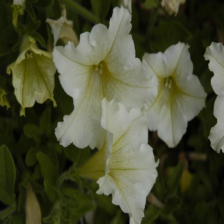

In [ ]:
def out_file(predictions, test_data_name, out_filename):

    print('\n===============================================')
    tensor2img = T.ToPILImage()
    print(f'Writing predictions to --> {out_filename}')
    with open(out_filename, 'w') as out:
        out.write('img_name,id\n')
        for (tensor_x, file_name), ans in zip(test_data_name, predictions):
          img = tensor2img(tensor_x)
          out.write(str(file_name) + ',' + str(ans) + '\n')
        img.show()
    print('===============================================')


out_file(predictions, test_data_name, 'Flowers102_ResNet.csv')